In [19]:
import pandas as pd

In [123]:
tmp = pd.read_csv('ta_20200722102317.csv', encoding='ANSI')

## 결측치 처리

In [124]:
tmp.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    1
dtype: int64

In [125]:
tmp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1988-08-04,108,27.6,22.4,33.2
1,1988-08-05,108,27.4,23.5,33.2
2,1988-08-06,108,29.0,24.8,33.1
3,1988-08-07,108,30.2,25.2,36.0
4,1988-08-08,108,29.6,26.3,33.4
...,...,...,...,...,...
11670,2020-07-17,108,26.0,21.5,31.6
11671,2020-07-18,108,26.1,22.8,31.0
11672,2020-07-19,108,24.0,20.6,26.6
11673,2020-07-20,108,23.8,22.4,26.6


In [126]:
pd.isnull(tmp).any(1).nonzero()[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([10661], dtype=int64)

In [127]:
tmp.iloc[10661,:]

날짜         2017-10-12
지점                108
평균기온(℃)          11.4
최저기온(℃)           8.8
최고기온(℃)           NaN
Name: 10661, dtype: object

In [128]:
tmp.drop(10661, inplace=True)

In [129]:
tmp.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [130]:
tmp.dtypes

날짜          object
지점           int64
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
dtype: object

In [131]:
tmp['날짜'] = pd.to_datetime(tmp['날짜'])

In [132]:
tmp.dtypes

날짜         datetime64[ns]
지점                  int64
평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
dtype: object

## 시각화

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

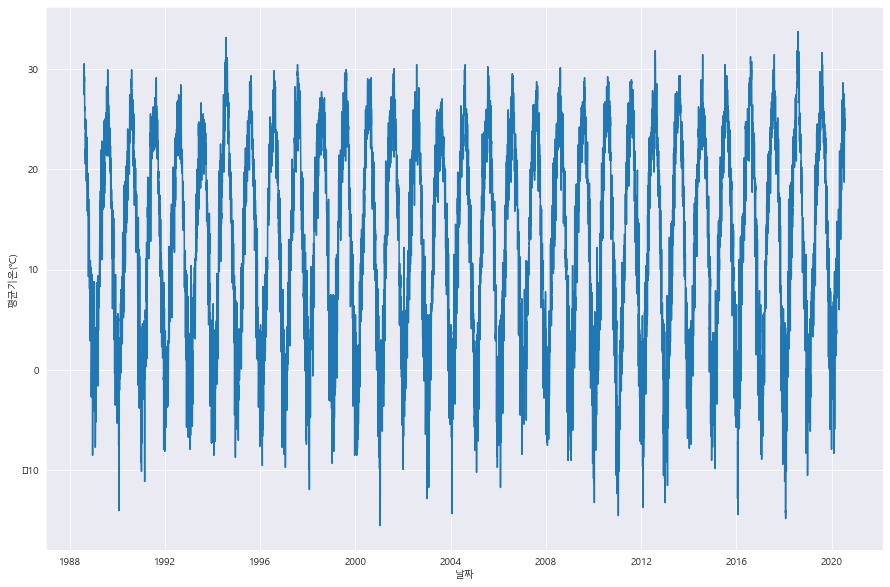

In [155]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=tmp['날짜'],
                  y=tmp['평균기온(℃)'], 
                  data=tmp)
plt.show()

In [116]:
tmp2 = tmp.set_index(tmp['날짜'])

In [118]:
tmp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,,
1988-08-04,1988-08-04,108,27.6,22.4,33.2
1988-08-05,1988-08-05,108,27.4,23.5,33.2
1988-08-06,1988-08-06,108,29.0,24.8,33.1
1988-08-07,1988-08-07,108,30.2,25.2,36.0
1988-08-08,1988-08-08,108,29.6,26.3,33.4
...,...,...,...,...,...
2020-07-17,2020-07-17,108,26.0,21.5,31.6
2020-07-18,2020-07-18,108,26.1,22.8,31.0
2020-07-19,2020-07-19,108,24.0,20.6,26.6


In [119]:
tmp2.drop('지점', axis=1, inplace=True)

In [120]:
tmp2.drop('날짜', axis=1, inplace=True)

<Figure size 1080x720 with 0 Axes>

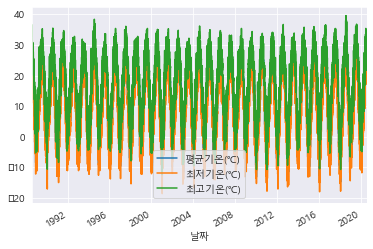

In [156]:
plt.figure(figsize=(15,10))
tmp2.plot()
plt.show()

# 산점도

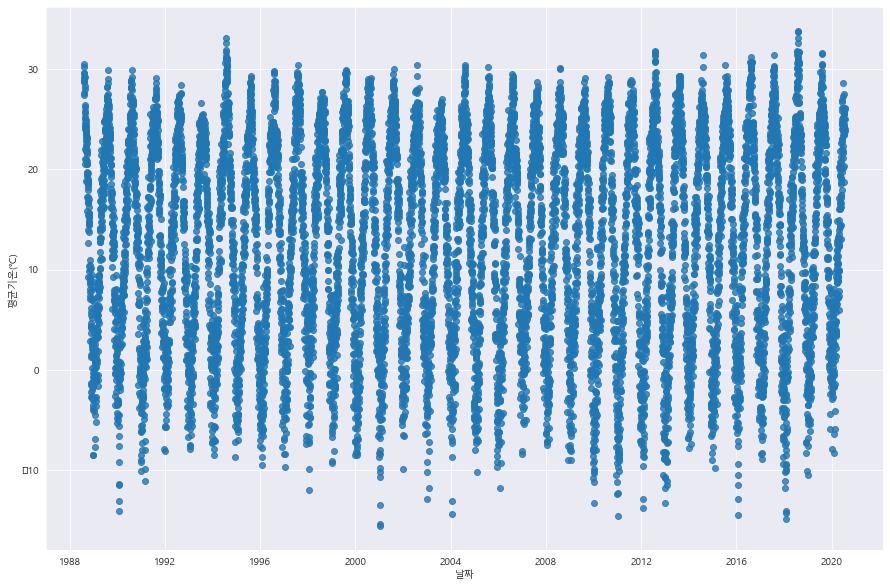

In [157]:
plt.figure(figsize=(15,10))
sns.regplot(x=tmp['날짜'], y=tmp['평균기온(℃)'], fit_reg=False)
plt.show()

## 마커 모양 -> maker =""
## 범주별 색상 -> hue = ""

## 시계열

In [134]:
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [133]:
df = pd.DataFrame({
    'ds' : tmp['날짜'],
    'y' : tmp['평균기온(℃)']
})

In [135]:
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [136]:
future =m.make_future_dataframe(periods=365)

In [137]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1988-08-04,27.095240,23.054072,31.078494
1,1988-08-05,27.113185,23.380046,30.801794
2,1988-08-06,27.202625,23.197723,30.870048
3,1988-08-07,27.166733,23.001302,31.168447
4,1988-08-08,27.105788,23.150857,30.957360
...,...,...,...,...
12034,2021-07-17,26.347361,22.628674,30.072005
12035,2021-07-18,26.476069,22.564860,30.272643
12036,2021-07-19,26.595008,22.358027,30.588883
12037,2021-07-20,26.591281,22.488213,30.442155


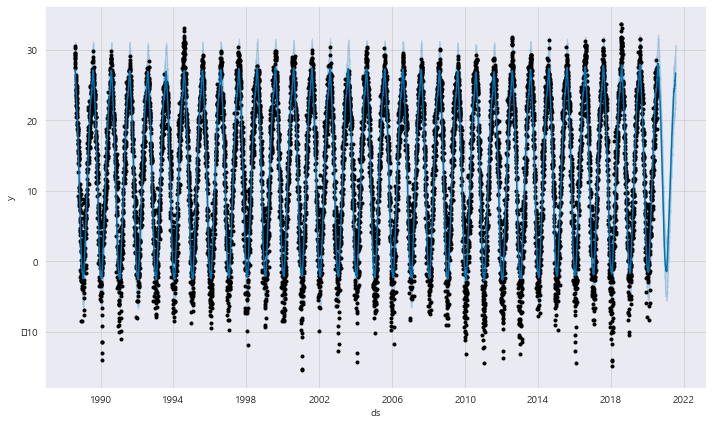

In [138]:
m.plot(forecast);

### 월별

In [147]:
future =m.make_future_dataframe(periods=12, freq='m')

In [148]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
11681,2021-02-28,4.298963,0.054403,8.364844
11682,2021-03-31,9.975798,5.939466,13.904502
11683,2021-04-30,16.490013,12.656216,20.369475
11684,2021-05-31,21.551536,17.564892,25.618544
11685,2021-06-30,24.503320,20.830274,28.461497


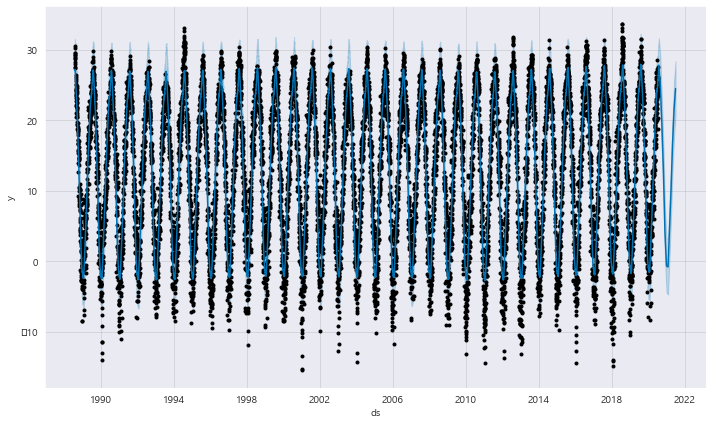

In [141]:
m.plot(forecast);

### 주별

In [142]:
future =m.make_future_dataframe(periods=48, freq='w')

In [145]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
11717,2021-05-23,20.124435,16.013431,24.042212
11718,2021-05-30,21.390130,17.350023,25.428902
11719,2021-06-06,22.611379,18.619764,26.705317
11720,2021-06-13,23.563625,19.828521,27.717252
11721,2021-06-20,24.158921,20.394425,28.095252


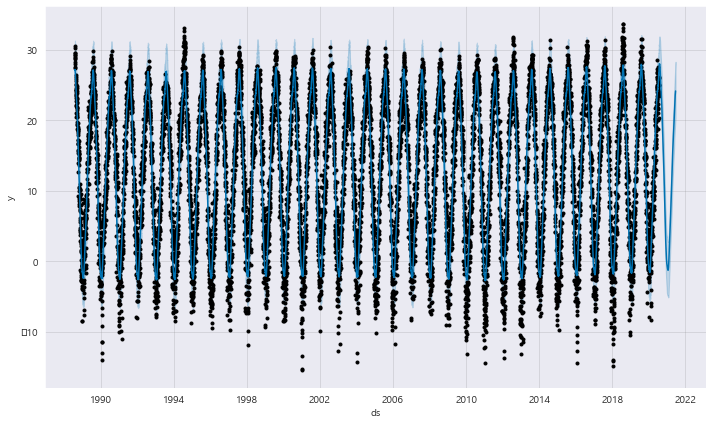

In [144]:
m.plot(forecast);

# 결론
1. 예측된 값은 기존과 큰 차이 없이 비슷한 모양으로 만들어질 것으로 예상된다.
2. 예측된 값이 이전보다 더 적은 편차를 가질 것으로 예상된다.